Exploratory data analysis:

1. We have in total of (1338, 7) rows and columns, with no null values,
    
    column info is as follows:
    
     0   age       1338 non-null   int64  
     1   sex       1338 non-null   object 
     2   bmi       1338 non-null   float64
     3   children  1338 non-null   int64  
     4   smoker    1338 non-null   object 
     5   region    1338 non-null   object 
     6   charges   1338 non-null   float64
     
 2. From data description , of age column min age is 18 and max age is 64 with standard deviation being 14 which is high.
    High variation in charges column can be seen with 13270 being mean charges and 63770 being highest charges taken.
    
 3. 1 duplicate value can be found and we have dropped it.
 
 4. By checking the value counts of smokers and non smokers, 
 
    no     1063
    yes     274
    
    big difference is oberved which proves that the dataset is imbalanced.
    
    sex column and region column has balanced data destribution with nearly equal number of people belonging to each category.
    
 5. Mean insurance charges taken from males and females: 
 
    female	12569.578844
    male	13974.998864
    
    are close to each other.
    
 6. Max number of people from the dataset have 0 children ie they are not parents.
 
 7. Max number of smokers are from southeast region.
 
 8. Using catplot between smokers and charges , we can surely say that insurance charges for smokers are more as compared to       non smokers.
    
    Also from scatterplot between charges and smokers , a slight +ive relationship exists between them.
    
 9. People having less bmi, tend to have less insurance charges , and people with high bmi pay more insurance charges.
 
 10. From data distribution of charges and age data, it can be concluded that the data is skewed.
 
 11. From correlation matrics, age and bmi tend to be more closely related to charges column.    

In [507]:
# Imp libs:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Standardizing and Normalizing data:
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
import xgboost as xgb

# Spliting data
from sklearn.model_selection import train_test_split,GridSearchCV

# Importing metrics
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error

# Removing warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [439]:
training_dataset = 'https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv'
df = pd.read_csv(training_dataset)

In [440]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [441]:
df.shape

(1338, 7)

In [442]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [443]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [444]:
"""Descriptive analytics:
    
It can be observed that there are no null values.

All values seem to be ok."""

df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [445]:
# Lets check for duplicated values:

print(df[df.duplicated(keep=False)])

# drop duplicated values
df.drop_duplicates(inplace=True)

     age   sex    bmi  children smoker     region    charges
195   19  male  30.59         0     no  northwest  1639.5631
581   19  male  30.59         0     no  northwest  1639.5631


In [446]:
df.shape

(1337, 7)

In [447]:
# Checking if imbalanced dataset:

df['smoker'].value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

In [448]:
df['sex'].value_counts()

male      675
female    662
Name: sex, dtype: int64

In [449]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

<AxesSubplot:xlabel='smoker'>

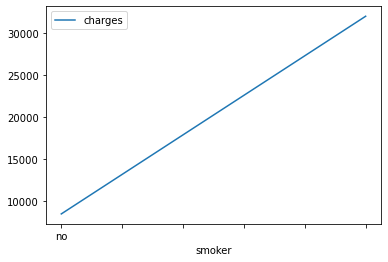

In [450]:
# average charges values based on smoking

df.groupby(by="smoker").charges.mean().to_frame().plot()

In [451]:
# average charges values based on sex

df.groupby(by="sex").charges.mean().to_frame()

,charges
sex,
female,12569.578844
male,13974.998864


In [452]:
# average charges values based on region:

df.groupby(by="region").charges.mean().to_frame()

,charges
region,
northeast,13406.384516
northwest,12450.840844
southeast,14735.411438
southwest,12346.937377


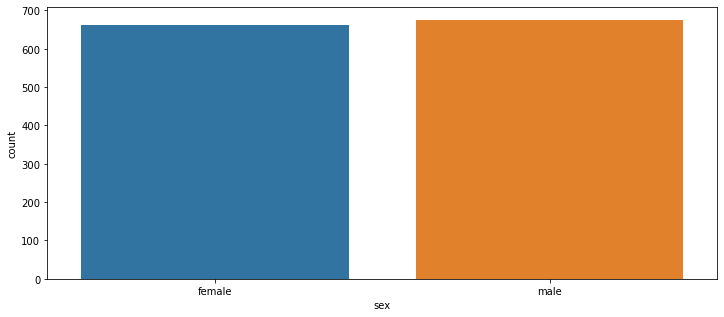

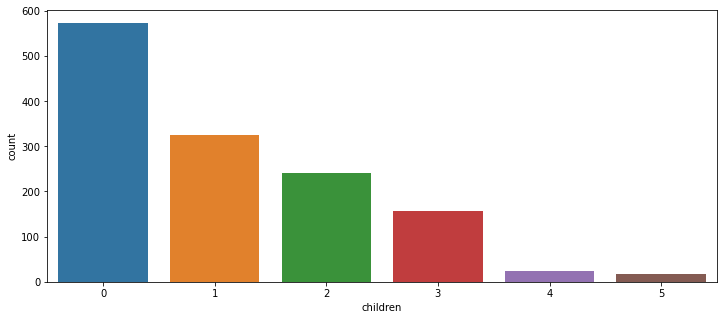

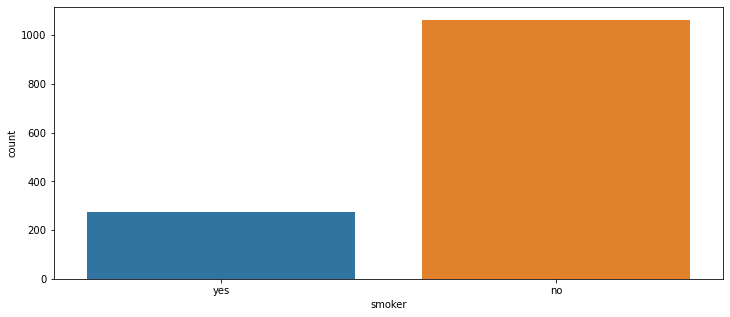

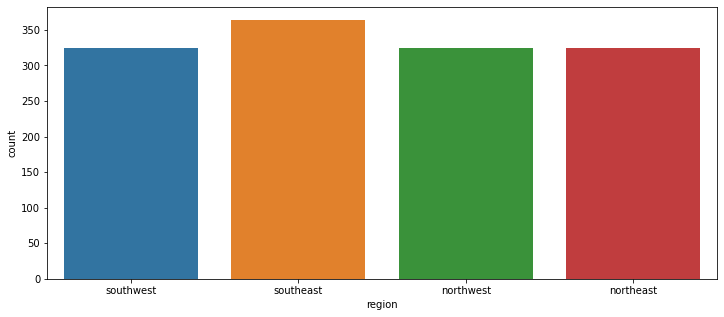

In [453]:
# Univariate analysis:

categorical_features = ['sex', 'children', 'smoker', 'region']

for i in categorical_features:
    f= plt.figure(figsize=(12,5))
    ax = sns.countplot(x=df[i],data=df)


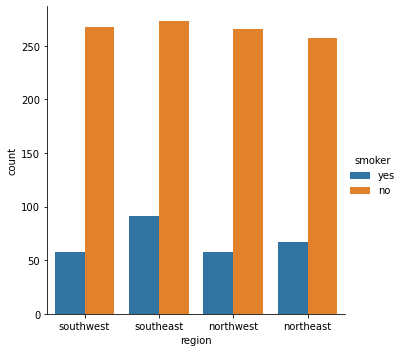

In [454]:
# Checking Smoking status by region

sns.catplot(x="region", kind="count",hue = 'smoker', data=df)

In [455]:
# Multivariate analysis

# Checking relationship between features and label:

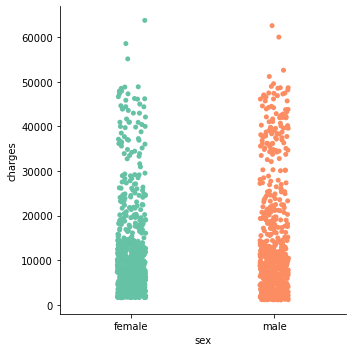

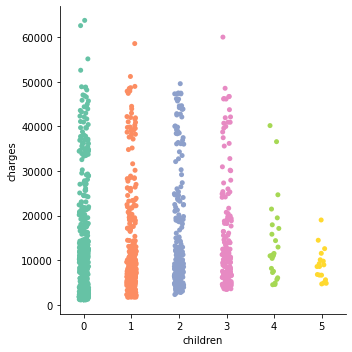

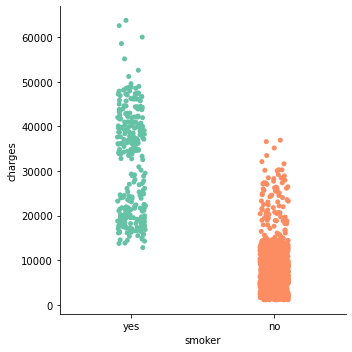

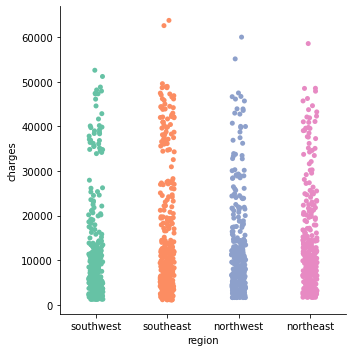

In [456]:
sns.catplot(x = "sex", y = "charges", palette = "Set2", data = df)

sns.catplot(x = "children", y = "charges", palette = "Set2", data = df)

sns.catplot(x = "smoker", y = "charges", palette = "Set2", data = df)

sns.catplot(x = "region", y = "charges", palette = "Set2", data = df)

'We can observe, charges are higher when the person is a smoker as compared to non smoker.\n\nWe can also observe a positive relationship between age and charges. For older people charges seem to be higher.'

<Figure size 864x360 with 0 Axes>

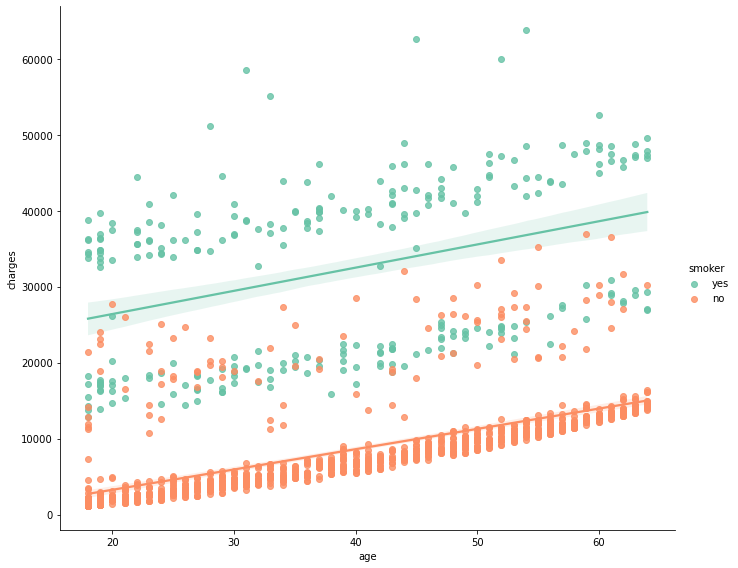

In [457]:
# Scatter plot of age and Charges: 
f= plt.figure(figsize=(12,5))
ax =sns.lmplot(x = "age", y = "charges", data=df, hue='smoker', palette='Set2', height=8, aspect=1.2)

"""We can observe, charges are higher when the person is a smoker as compared to non smoker.

We can also observe a positive relationship between age and charges. For older people charges seem to be higher."""

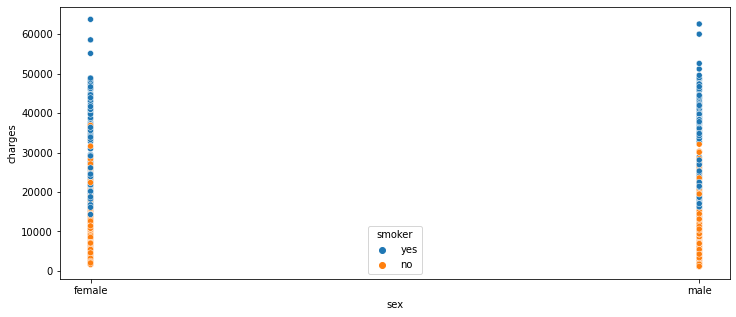

In [458]:
# Scatter plot of sex and Charges: 
f= plt.figure(figsize=(12,5))
ax =sns.scatterplot(x = "sex", y = "charges", data=df, hue='smoker')

'From this Lmplot we can conclude that, charges tend to be less when person is non smoker, in this case bmi is not highly related\nbut when person is smoker, regardless of bmi beign high or low, charges are higher.'

<Figure size 864x360 with 0 Axes>

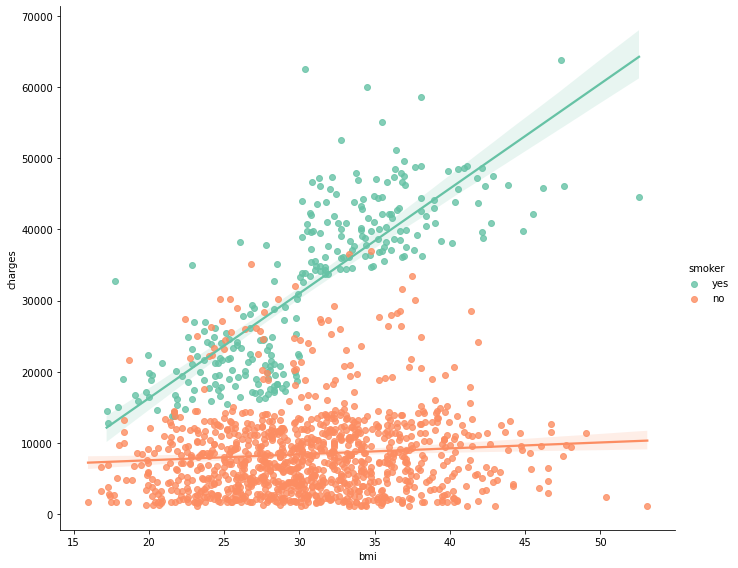

In [459]:
# Relationship between BMI and Charges: 

f= plt.figure(figsize=(12,5))
ax =sns.lmplot(x = "bmi", y = "charges", data=df, hue='smoker', palette='Set2', height=8, aspect=1.2)

"""From this Lmplot we can conclude that, charges tend to be less when person is non smoker, in this case bmi is not highly related
but when person is smoker, regardless of bmi beign high or low, charges are higher."""

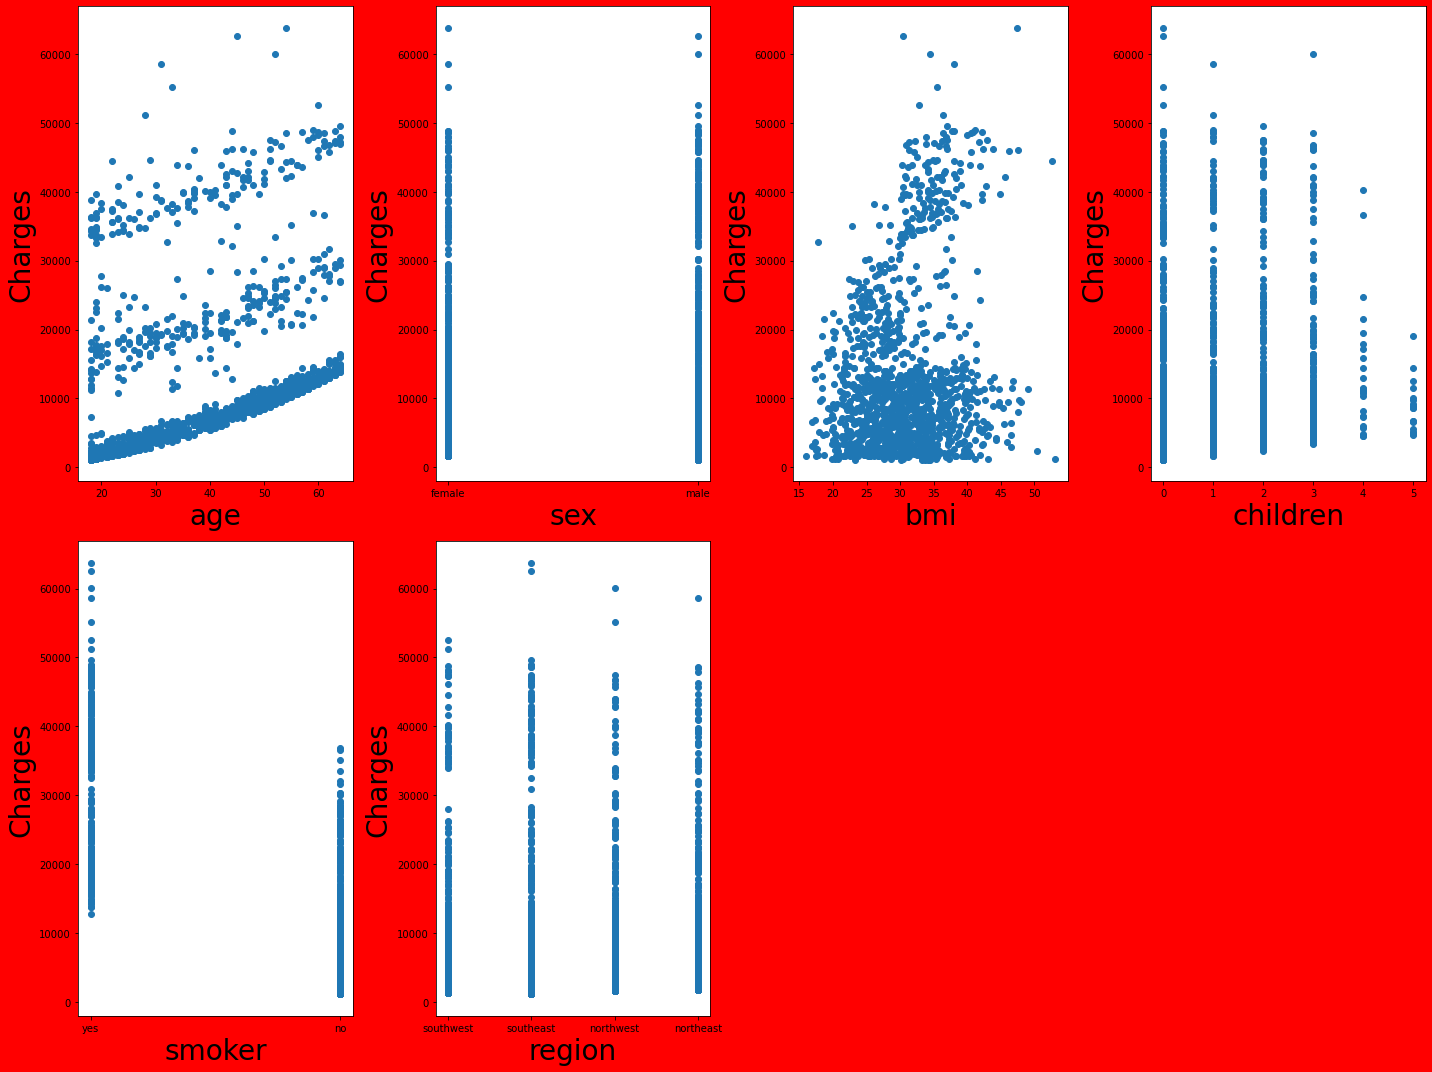

In [502]:
# Finding relationship i.e. every feature vs label:

plt.figure(figsize=(20,15),facecolor='red')
plotnumber = 1

for column in df.columns:
    if plotnumber <= 6:
        ax = plt.subplot(2,4,plotnumber)
        plt.scatter(df[column],y)
        plt.xlabel(column,fontsize = 28)
        plt.ylabel('Charges',fontsize = 28)
        
    plotnumber +=1
plt.tight_layout() # plt.show() can be used

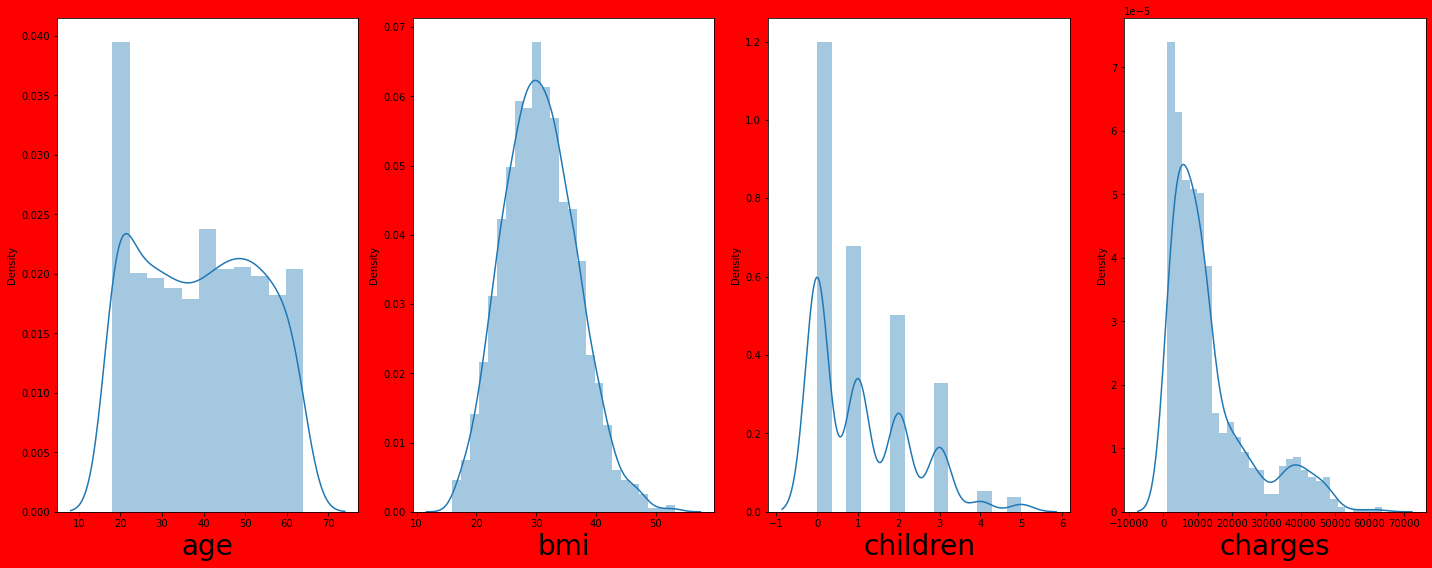

In [554]:
# Plotting distribution plot to check data distribution.

import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(20,15),facecolor='red')
plotnumber = 1

num_col = ['age','bmi','children','charges']

for col in num_col:
    if plotnumber <= 4:
        ax = plt.subplot(2,4,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize = 28)
        
    plotnumber +=1
plt.tight_layout() # plt.show() can be used

In [ ]:
# For identifying outliers, plotting a boxplot:

num_feature_cols = ['age','bmi','children','charges']


plt.figure(figsize=(20,25),facecolor='Yellow')
plotnumber = 1
for cols in num_feature_cols:
    if plotnumber <= 4:
        ax = plt.subplot(2,2,plotnumber)
        sns.boxplot(df[cols])
        plt.xlabel(cols,fontsize=20)
    plotnumber += 1
plt.show()

In [ ]:
"""# Finding outliers:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3-q1
print(q1,'\n\n',q3,'\n\n',iqr)"""

In [ ]:
"""# Outlier calculation:
hs = q3 + 1.5*iqr
ls = q1 - 1.5*iqr

print('Lower side: \n\n',ls)
print('Higher side: \n\n',hs)"""

In [ ]:
"""charges_high = q3.charges + (1.5 * iqr.charges)
charges_high

index_charges_outliers = np.where(df['charges']>charges_high)
print(index_charges_outliers)"""

In [ ]:
"""df.drop(df.index[index_charges_outliers],inplace=True)
print(df.shape)
df.reset_index()"""

In [461]:
"""bmi_high = q3.bmi + (1.5 * iqr.bmi)
bmi_high

index_bmi_outliers = np.where(df['bmi']>bmi_high)
print(index_bmi_outliers)"""

"bmi_high = q3.bmi + (1.5 * iqr.bmi)\nbmi_high\n\nindex_bmi_outliers = np.where(df['bmi']>bmi_high)\nprint(index_bmi_outliers)"

In [462]:
"""df.drop(df.index[index_bmi_outliers],inplace=True)
print(df.shape)
df.reset_index()"""

'df.drop(df.index[index_bmi_outliers],inplace=True)\nprint(df.shape)\ndf.reset_index()'

In [463]:
"""# Using Z Statistics to check and remove any more outliers:

from scipy.stats import zscore

col = ['age','bmi','children','charges']

z_score = zscore(df[col])

abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis=1) # values lying in 3 times std will be removed

df = df[filtering_entry]

df.describe()"""

"# Using Z Statistics to check and remove any more outliers:\n\nfrom scipy.stats import zscore\n\ncol = ['age','bmi','children','charges']\n\nz_score = zscore(df[col])\n\nabs_z_score = np.abs(z_score)\n\nfiltering_entry = (abs_z_score < 3).all(axis=1) # values lying in 3 times std will be removed\n\ndf = df[filtering_entry]\n\ndf.describe()"

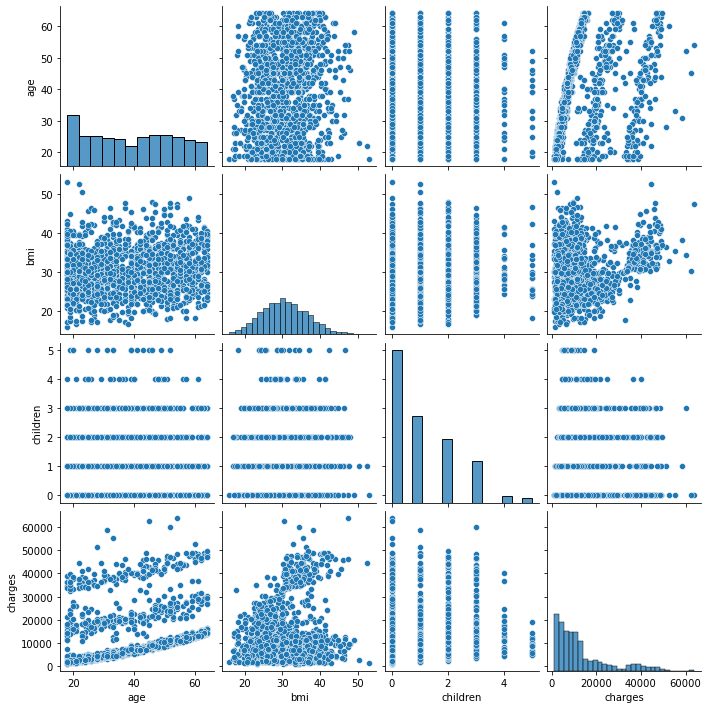

In [552]:
sns.pairplot(df)

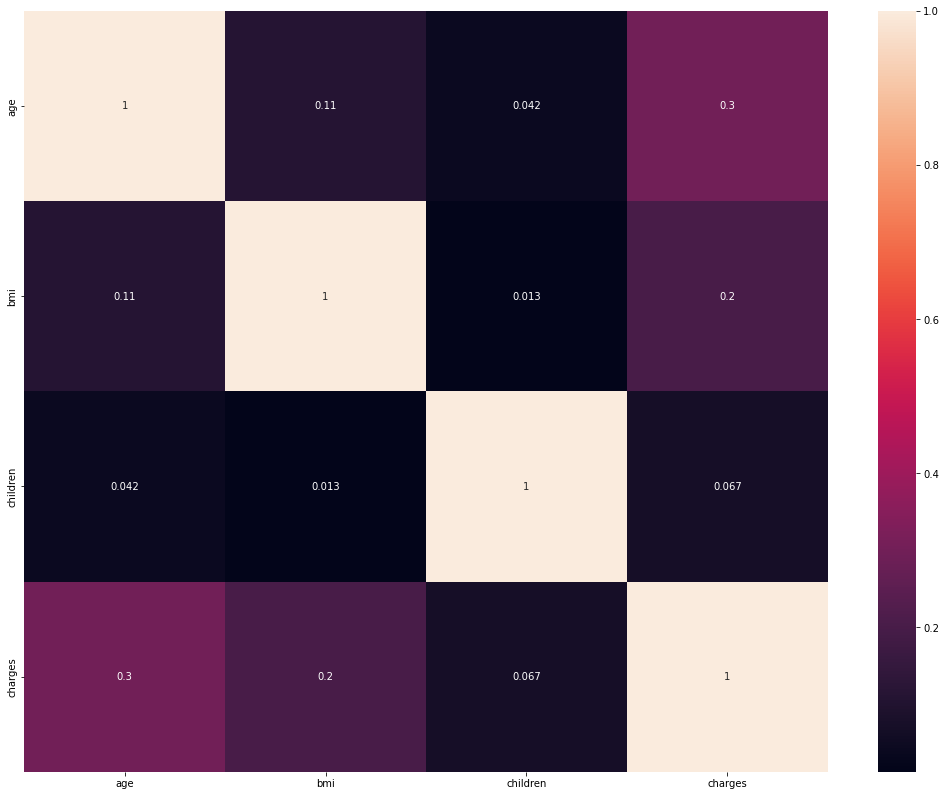

In [464]:
df_corr = df.corr().abs()
plt.figure(figsize=(18,14))
sns.heatmap(df_corr,annot=True,annot_kws={'size':10})
plt.show()

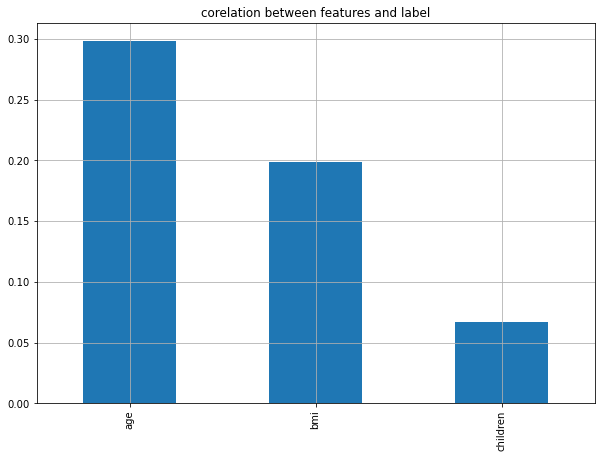

In [465]:
# Correlation between features and label:

df.drop(columns = 'charges',axis = 1).corrwith(df.charges).plot(kind='bar',grid=True,figsize=(10,7),title='corelation between features and label')
plt.show()

In [466]:
# Checking skewness
df.skew().sort_values(ascending=False)

charges     1.515391
children    0.937421
bmi         0.283914
age         0.054781
dtype: float64

In [467]:
df_dummified = pd.get_dummies(df)

In [468]:
y = df_dummified['charges']
X = df_dummified.drop(columns = ['charges'])

In [471]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

In [478]:
# Splitting our data to training data and testing data
# x_train,x_test,y_train,y_test

x_train,x_test,y_train,y_test = train_test_split(X_standard,y,test_size=0.20,random_state=348)

# Here we are keeping training data as our scalled data and testing data as our label or target.

In [479]:
# MOdel instantiating and training

rm = LinearRegression()
rm.fit(x_train,y_train) 
# here we will pass training data

LinearRegression()

In [480]:
# Testing our model with Adjusted R2 Square: 

# on training data

rm.score(x_train,y_train)

0.7447973310806468

In [481]:
# PLotting and visualizing

y_pred = rm.predict(x_test)

In [482]:
# y_pred # for test data these are charges

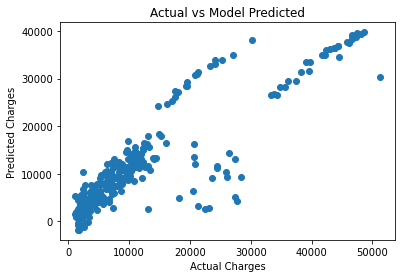

In [483]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Model Predicted')
plt.show()

In [484]:
# Model Evaluation: MAE , MSE , RMSE

from sklearn.metrics import mean_absolute_error,mean_squared_error

mean_absolute_error(y_test,y_pred) # 4 % error

4003.4393289755767

In [485]:
mean_squared_error(y_test,y_pred) # lesser the better

34994394.19172916

In [486]:
# RMSE
np.sqrt(mean_squared_error(y_test,y_pred))

5915.605986856221

In [487]:
print("Score: ", rm.score(x_test, y_test))

Score:  0.7710345509390542


In [488]:
#model performance

print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))
print("MSE: ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", metrics.mean_squared_error(y_test, y_pred, squared=False))
print("R2: ", metrics.r2_score(y_test, y_pred), "\n")
print("Score: ", rm.score(x_test, y_test))

MAE:  4003.4393289755767
MSE:  34994394.19172916
RMSE:  5915.605986856221
R2:  0.7710345509390542 

Score:  0.7710345509390542


In [489]:
print(rm.coef_)
print(f"{rm.intercept_:.2f}")

[ 3.62096307e+03  2.12267949e+03  5.26356955e+02  5.69889790e+14
  5.69889790e+14 -2.32366621e+15 -2.32366621e+15 -1.02250978e+17
 -1.02250978e+17 -1.06217813e+17 -1.02358091e+17]
13208.05


In [490]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

lassocv = LassoCV(alphas = None , max_iter = 100, normalize = True)
lassocv.fit(x_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [491]:
# Best alpha parameter
alpha = lassocv.alpha_ # Best alpha rate
alpha

0.4080130200419665

In [492]:
# Now since we have the best parameter, lasso regression will be used:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)
# i.e. when model is training it will learn at this speed 6....

Lasso(alpha=0.4080130200419665)

In [493]:
lasso_reg.score(x_test,y_test)

0.7706620177738799

In [494]:
# Ridge Method:

ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01),normalize = True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [495]:
ridgecv.alpha_ # Best alpha rate

0.001

In [496]:
ridge_model = Ridge(alpha = ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.001)

In [497]:
ridge_model.score(x_test,y_test)

0.7706546259666988

In [501]:
# Finding best random state for Linear regression model:

maxAccu = 0
maxRM = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X_standard,y,test_size = 0.20 , random_state=1)
    lr = LinearRegression()
    lr.fit(x_train,y_train) 
    y_pred = lr.predict(x_test)
    rm = lr.score(x_test, y_test)
    print('Testing accuracy: ', rm, 'at random state', i)
    
    if rm > maxRM:
        maxAccu = rm
        maxRS = i
        print('Max accuracy',maxAccu,'max random state',maxRS)
        #model performance
        print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))
        print("MSE: ", metrics.mean_squared_error(y_test, y_pred))
        print("RMSE: ", metrics.mean_squared_error(y_test, y_pred, squared=False))
        print("R2: ", metrics.r2_score(y_test, y_pred), "\n")
        print("Score: ", lr.score(x_test, y_test))

Testing accuracy:  0.7496432111877507 at random state 1
Max accuracy 0.7496432111877507 max random state 1
MAE:  3935.4616233370853
MSE:  32386109.93867008
RMSE:  5690.87953998941
R2:  0.7496432111877507 

Score:  0.7496432111877507
Testing accuracy:  0.7496432111877507 at random state 2
Max accuracy 0.7496432111877507 max random state 2
MAE:  3935.4616233370853
MSE:  32386109.93867008
RMSE:  5690.87953998941
R2:  0.7496432111877507 

Score:  0.7496432111877507
Testing accuracy:  0.7496432111877507 at random state 3
Max accuracy 0.7496432111877507 max random state 3
MAE:  3935.4616233370853
MSE:  32386109.93867008
RMSE:  5690.87953998941
R2:  0.7496432111877507 

Score:  0.7496432111877507
Testing accuracy:  0.7496432111877507 at random state 4
Max accuracy 0.7496432111877507 max random state 4
MAE:  3935.4616233370853
MSE:  32386109.93867008
RMSE:  5690.87953998941
R2:  0.7496432111877507 

Score:  0.7496432111877507
Testing accuracy:  0.7496432111877507 at random state 5
Max accuracy

In [526]:
# Using decision tree:

from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()

model.fit(x_train, y_train)

y_preddt = model.predict(x_test)

r2_score(y_test,y_preddt)


0.6426201220790942

In [529]:
# Hyper parameter tuning for dt:

min_split = np.array([2, 3, 4, 5, 6, 7])
max_nvl = np.array([3, 4, 5, 6, 7, 9, 11])
alg = ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
values_grid = {'min_samples_split': min_split, 'max_depth': max_nvl, 'criterion': alg}

gridDecisionTree = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5)

gridDecisionTree.fit(x_train, y_train)

y_predgdt = model.predict(x_test)

r2_score(y_test,y_predgdt)

0.6426201220790942

In [539]:
# Model Evaluation: MAE , MSE , RMSE

from sklearn.metrics import mean_absolute_error,mean_squared_error

print("MAE: ", metrics.mean_absolute_error(y_test, y_predgdt))
print("MSE: ", metrics.mean_squared_error(y_test, y_predgdt))
print("RMSE: ", metrics.mean_squared_error(y_test, y_predgdt, squared=False))
print("R2: ", metrics.r2_score(y_test, y_predgdt), "\n")
print("Score: ", gridDecisionTree.score(x_test, y_predgdt))

MAE:  3270.6440887686567
MSE:  46230597.82451026
RMSE:  6799.3086284202645
R2:  0.6426201220790942 

Score:  0.7893098626332843


In [531]:
# Random forest:

from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators = 100)

regressor_rf.fit(x_train, y_train)

lr_normal_rf = regressor_rf.score(x_train, y_train)

lr_normal_rf

0.9776874293430728

In [537]:
y_predrf = regressor_rf.predict(x_test)

lr_normal_rf_test = regressor_rf.score(x_test, y_test)

lr_normal_rf_test

mse_lr_normal_rf  = mean_absolute_error(y_test, y_predrf)

mse_lr_normal_rf

2582.7622140967155

In [540]:
# Model Evaluation: MAE , MSE , RMSE

from sklearn.metrics import mean_absolute_error,mean_squared_error

print("MAE: ", metrics.mean_absolute_error(y_test, y_predrf))
print("MSE: ", metrics.mean_squared_error(y_test, y_predrf))
print("RMSE: ", metrics.mean_squared_error(y_test, y_predrf, squared=False))
print("R2: ", metrics.r2_score(y_test, y_predgdt), "\n")
print("Score: ", regressor_rf.score(x_test, y_predrf))

MAE:  2582.7622140967155
MSE:  21492134.23412449
RMSE:  4635.960982808687
R2:  0.6426201220790942 

Score:  1.0


In [543]:
# Using Support vector regressor:

# Fit the model over the training data
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train, y_train)

y_predsvr = svr.predict(x_test)

r2_score(y_test,y_predsvr)

-0.03521683625541372

In [560]:
# Using XGBoost:

xgb_clf = xgb.XGBRegressor()
xgb_clf.fit(x_train,y_train)

y_predx = xgb_clf.predict(x_test)

r2_score(y_test,y_predx)

0.7788028894332615

In [557]:
# Hyperparameter tuning for xgboost model

params = {"learning_rate"    : [0.05, 0.10] ,
         "max_depth"        : [ 3, 5, 8, 12]}

grd = GridSearchCV(xgb_clf,param_grid=params)



In [556]:
xgb_boosted = grd.fit(x_train,y_train)

y_predxx = xgb_boosted.predict(x_test)

r2_score(y_test,y_predxx)

0.8679346977497835

In [550]:
# Model Evaluation: MAE , MSE , RMSE

from sklearn.metrics import mean_absolute_error,mean_squared_error

print("MAE: ", metrics.mean_absolute_error(y_test, y_predxx))
print("MSE: ", metrics.mean_squared_error(y_test, y_predxx))
print("RMSE: ", metrics.mean_squared_error(y_test, y_predxx, squared=False))
print("R2: ", metrics.r2_score(y_test, y_predxx), "\n")
print("Score: ", xgb_boosted.score(x_test, y_predxx))

MAE:  2280.159274650041
MSE:  17083944.150468905
RMSE:  4133.2728134577455
R2:  0.8679346977497835 

Score:  1.0


In [548]:
# Innitiate k neighbour Regressor:

from sklearn.neighbors import KNeighborsRegressor

params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = KNeighborsRegressor()

knnmodel = GridSearchCV(knn, params, cv=5)
knnmodel.fit(x_train,y_train)
knnmodel.best_params_

{'n_neighbors': 5}

In [549]:
knn_best = KNeighborsRegressor(n_neighbors = 5)
knn_best.fit(x_train,y_train)

KNeighborsRegressor()

In [551]:
y_predknn = knn_best.predict(x_test)

r2_score(y_test,y_predknn)

0.7733457496257325